<a href="https://colab.research.google.com/github/Vaishnavi943/plant-disease-predict-ML/blob/main/PlantDieseasePrediction_CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## seeding for reproducibility

In [ ]:
# Set seeds for reproducibility-

# makes the sequence of numbers predictable and repeatable, but only if the same seed is used.
# Without setting a seed, the numbers generated will be different on each run.
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# importing the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

# **DATA CURATION**

upload the Kaggle.json files

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variable
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [ ]:
# download the datasets from an API Call
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:15<00:00, 231MB/s]
100% 2.04G/2.04G [00:15<00:00, 141MB/s]


In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# unzip the downloaded datasets
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

['grayscale', 'color', 'segmented']
38
['Grape___Black_rot', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Apple___Black_rot', 'Strawberry___Leaf_scorch']
38
['Grape___Black_rot', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Apple___Black_rot', 'Strawberry___Leaf_scorch']
38
['Grape___Black_rot', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Apple___Black_rot', 'Strawberry___Leaf_scorch']


# Number of Classes: 38

In [ ]:
# plantvillage dataset(3)(segmented, grayscale, color)--->38 subdirectory like Tomato___healthy, Strawberry___Leaf_scorc, etc ----> 423 files
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy"))

423
['cec7f924-af25-4461-9ef2-6a9525ac6513___Mt.N.V_HL 6029.JPG', 'dc89d1b9-0c5c-4178-b341-c8675d04dad3___Mt.N.V_HL 8971.JPG', '5367d0e4-7902-4dce-bfda-eeb0c9195873___Mt.N.V_HL 9092.JPG', '75ad9d58-7f7e-4a4c-8ced-fec8d23d9a7e___Mt.N.V_HL 6170.JPG', '8fab615a-502c-4044-b863-459b04a70158___Mt.N.V_HL 8990.JPG', '41b69ecd-4f54-4601-981e-8e5659f4ab76___Mt.N.V_HL 9071.JPG', '55afb57b-04f7-437c-92ae-d2b859de5fc1___Mt.N.V_HL 8974.JPG', '63a683df-44e9-410f-b04c-c07220e3b9a3___Mt.N.V_HL 9089.JPG', '393e4626-fd31-45aa-a67d-bb71837332ee___Mt.N.V_HL 9130.JPG', '515937e8-f329-406e-8d77-c9ddba3e399b___Mt.N.V_HL 9098.JPG', 'e51ee2ab-a7f5-4558-83e3-7bf6d0364c63___Mt.N.V_HL 6064.JPG', 'f8bb34c3-13a4-4762-a16d-79ec49823e3e___Mt.N.V_HL 8911.JPG', 'cf290224-e5ca-4d0b-8037-c147acfc290d___Mt.N.V_HL 6049.JPG', '8c5181ab-8b06-41a8-9b26-b3be052dcea1___Mt.N.V_HL 8905.JPG', '87c9d8e2-3009-4e40-9db4-8fe35ab76599___Mt.N.V_HL 6058.JPG', '386f8bff-7dbb-42db-80f7-fc36fc226a97___Mt.N.V_HL 8981.JPG', '63e38ffd-dfb4-4fc0

# ***DATA PREPROCESSING***

In [ ]:
# Dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


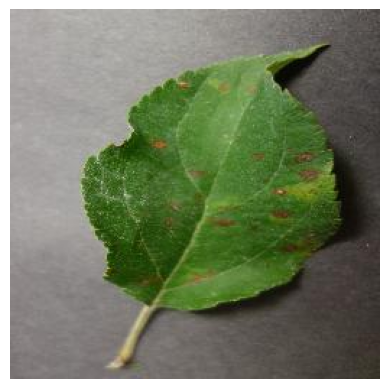

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667.JPG'

# read the image
img = mpimg.imread(image_path)

print(img.shape)

# display the image
plt.imshow(img)
plt.axis("off")     #turn off axis numbers
plt.show()

In [ ]:
# Initially image RGB values lies between 0-255 range, Model can't read out this range so for easy reading for our model we have to convert this pixel values range in binary(0,1) form.

image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667.JPG'

# read the image
img = mpimg.imread(image_path)

print(img)

[[[176 172 171]
  [177 173 172]
  [178 174 173]
  ...
  [ 81  76  73]
  [ 79  74  71]
  [ 80  75  72]]

 [[180 176 175]
  [181 177 176]
  [181 177 176]
  ...
  [ 70  65  62]
  [ 75  70  67]
  [ 81  76  73]]

 [[180 176 175]
  [181 177 176]
  [181 177 176]
  ...
  [ 75  70  67]
  [ 73  68  65]
  [ 76  71  68]]

 ...

 [[122 116 116]
  [121 115 115]
  [121 115 115]
  ...
  [ 58  54  43]
  [ 58  54  43]
  [ 57  53  42]]

 [[124 118 118]
  [122 116 116]
  [120 114 114]
  ...
  [ 55  51  40]
  [ 53  49  38]
  [ 50  46  35]]

 [[125 119 119]
  [123 117 117]
  [120 114 114]
  ...
  [ 57  53  42]
  [ 56  52  41]
  [ 54  50  39]]]


# resizing the image size

In [ ]:
# image parameter:

img_size = 224
batch_size = 32


# **TRAIN TEST SPLIT**

80%-->training and 20%-->testing and we are doing this in the batch size and not in loop coz if all these image would uploaded together in the memory that would collapse your system.

In [ ]:
# Image Data Generator-

# Initially image RGB values lies between 0-255 range, Model can't read out this range so for easy reading for our model we have to convert this pixel values range in binary(0,1) form.

data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2    #use 20% of the data for validation
)

In [ ]:
# Train Generator-
train_generator = data_gen.flow_from_directory(
    base_dir,        #base_dir = 'plantvillage dataset/color'
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "training",
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator-
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "validation",
    class_mode = "categorical"
)

Found 10849 images belonging to 38 classes.


# **CONVOLUTIONAL NEURAL NETWORK** (CNN)

In [ ]:
# Model Definition-
model = models.Sequential()     # Sequential--> we use when we have linear stack of layers like tensor, to tensor

model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(img_size, img_size, 3)))    # 32-->2D kernal having (3,3) shape of filter
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(train_generator.num_classes, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model summary-
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model-

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
              )

# **MODEL TRAINING**

In [ ]:
# Training the model-

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,   # number of steps per epoch
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,  # validation steps
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 73ms/step - accuracy: 0.6042 - loss: 1.6238 - val_accuracy: 0.8776 - val_loss: 0.3915
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - accuracy: 0.9216 - loss: 0.2482 - val_accuracy: 0.8570 - val_loss: 0.4791
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.9673 - loss: 0.1041 - val_accuracy: 0.8812 - val_loss: 0.4278
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 71ms/step - accuracy: 0.9804 - loss: 0.0605 - val_accuracy: 0.8538 - val_loss: 0.5974
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 68ms/step - accuracy: 0.9769 - loss: 0.0692 - val_accuracy: 0.8963 - val_loss: 0.4762
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - accuracy: 0.9883 - loss: 0.0367 - val_accuracy: 0.8838 - val_loss: 0.5679
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 68ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.8626 - val_loss: 0.7221
Epoch 8/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.9885 - loss

# **MODEL EVALUATION**

In [ ]:
# Model Evaluation - comapring the accuracy and loss values

print("evaluating model....")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"validation accuracy: {val_accuracy * 100:.2f}%")

evaluating model....
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8428 - loss: 1.1430
validation accuracy: 84.49%


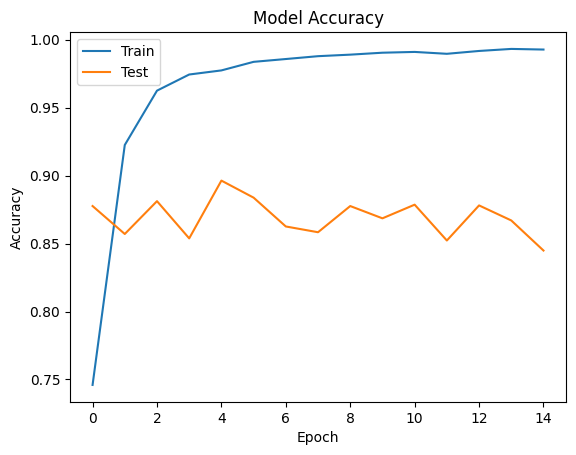

In [ ]:
# Plot training & validation accuracy values-

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')      # Changed 'Test' to 'Validation'
plt.show()


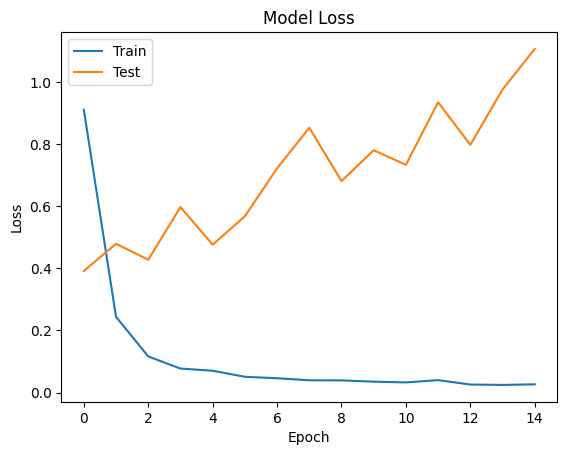

In [ ]:
# Plot training & validation loss values-

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# **BUILDING A PREDICTION**

In [ ]:
# Function to load and peprocessing image using Pillow-

def load_and_peprocessing_image(image_path, target_size = (224,224)):
  # load the image
  img = Image.open(image_path)
  # resize the image
  img = img.resize(target_size)
  # convert the img to numpy array
  img_array = np.array(img)
  # add batch dimension
  img_array = np.expand_dims(img_array, axis=0)
  # scale the img values to [0,1]
  img_array = img_array.astype('float32') / 255.
  return img_array

In [ ]:
# Function to predict the class of image-

def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_peprocessing_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name


In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json files-
json.dump(class_indices, open("class_indices.json", "w"))

In [ ]:
# Example usage-
image_path = '/content/test_potato_late_blind.JPG'
# image_path = '//content/test_tomato_yellow_leaf_virus.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result-
print("predicted class name: ", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted class name:  Tomato___Target_Spot


### **SAVE THE MODEL TO GOOGLE DRIVE OR LOCAL:**

In [ ]:
model.save('drive/MyDrive/projects/plant_disease_prediction_modelll.h5')